## 读取数据

In [13]:
import pandas as pd

# 读取文件
file_path = "WY_计算随访时间_cataract_更新的截止时间.csv"
df = pd.read_csv(file_path)

# ===========================================
# 字段标准化映射表（原始字段 → 统一字段）
# ===========================================
column_mapping = {
    # 1. 人口学与社会经济学特征
    "sex": "sex",
    "ethnic_background": "ethnic_background",
    "ethnic_l": "ethnic_l",
    "ethnic": "ethnic",
    "education_bl": "education_baseline",
    "age_bl": "age_baseline",

    # 2. 生活方式与行为因素
    "csmoking_bl": "smoking_status_baseline",
    
    "alcohol_freq_bl": "alcohol_frequency_baseline",
    "alcohol_bl": "alcohol_frequency_baseline1",
    "sleep_dur_bl": "sleep_duration_baseline",

    # 3. 人体测量学指标
    "bmi_bl": "bmi_baseline",
    "obesity": "obesity_status",

    # 4. 基线健康状况
    "diabetes_bl": "diabetes_baseline",
    "hypertension_bl": "hypertension_baseline",
    "heart_attack_bl": "myocardial_infarction_baseline",
    "heart_failure_bl": "heart_failure_baseline",
    "stroke_bl": "stroke_baseline",
    "kidney_stone_bl": "kidney_stone_baseline",
    "depression_bl": "depression_baseline",
    "cancer_bl": "cancer_baseline",
    "heart_disease": "heart_disease_composite",

    # 5. 眼科疾病基线状态
    "amd_bl": "amd_baseline",
    "amd_bl1": "amd_baseline1",
    "amd_blt": "amd_baseline2",
    "cataract_bl": "cataract_baseline",
    "glaucoma_bl": "glaucoma_baseline",
    "gla_blt": "glaucoma_baseline1",
    "diabetic_eye_bl": "diabetic_retinopathy_baseline",
    "dr_bl": "diabetic_retinopathy_baseline",
    "dr_blt": "diabetic_retinopathy_baseline",

    # 6. 实验室检测指标
    "hba1c_bl": "hba1c_baseline",
    "total_cholesterol": "total_cholesterol",
    "ldl_cholesterol": "ldl_cholesterol",
    "hdl_cholesterol": "hdl_cholesterol",
    "triglycerides": "triglycerides",

    # 7. 脂肪酸代谢指标
    "total_fa": "fatty_acids_total",
    "n3fa": "fatty_acids_n3",
    "n6fa": "fatty_acids_n6",
    "pufa": "fatty_acids_pufa",
    "mufa": "fatty_acids_mufa",
    "sfa": "fatty_acids_sfa",
    "la": "fatty_acids_la",
    "dha": "fatty_acids_dha",

    # 8. 遗传风险评分
    "n3fa_grs": "grs_n3fa",
    "n6fa_grs": "grs_n6fa",
    "pufa_grs": "grs_pufa",
    "tfa_grs": "grs_total_fa",

    # 9. 年龄分层分类
    "age_layer2": "age_quantile_2",
    "age50": "age_threshold_50",
    "age57": "age_threshold_57",
    "age60": "age_threshold_60",

    # 10. 随访与时间变量
    "date_interview": "interview_date",
    "date_interview_time": "interview_date",
    "lastdate": "last_followup_date",
    "followup_cataract_yrs": "followup_duration_cataract",
    "followup_cataract": "followup_duration_cataract",
    "followup_cataract_182": "followup_duration_cataract",
    "followdate_cataract": "followup_date_cataract",
    "eligible": "eligible_status",

    # 11. 疾病发病与结局事件
    "amd_onset": "amd_onset_date",
    "amd_onset_date": "amd_onset_date",
    "amd_onset_time": "amd_onset_date",
    "amd_days": "amd_time_to_event_days",
    "cataract_onset": "cataract_onset_date",
    "cataract_onset_date": "cataract_onset_date",
    "cataract_days": "cataract_time_to_event_days",
    "incident_cataract": "cataract_incident",
    "diabetic_eye_onset": "diabetic_eye_onset_date",
    "diabetic_eye_onset_date": "diabetic_eye_onset_date",
    "diabetic_eye_days": "diabetic_eye_time_to_event_days",
    "glaucoma_onset": "glaucoma_onset_date",
    "glaucoma_onset_date": "glaucoma_onset_date",
    "glaucoma_days": "glaucoma_time_to_event_days",

    # 12. 模型输出
    "amd_prediction": "amd_risk_prediction",
    "cataract_prediction": "cataract_risk_prediction",
    "diabetic_eye_prediction": "diabetic_eye_risk_prediction",
    "glaucoma_prediction": "glaucoma_risk_prediction",

    # 13. 数据管理标识
    "f_eid": "participant_id",
    "analysis_fa": "analysis_flag_fatty_acids",
    "metabolomic_age": "metabolomic_age",
}

# ==================================================
# 自动将 df 的列名映射到新名称（若存在）
# ==================================================
df = df.rename(columns={orig: new for orig, new in column_mapping.items() if orig in df.columns})

# 输出前 5 行，确认成功读取
print(df.head())

# 输出列名，确认字段统一
print("\n统一后的字段名：")
print(df.columns.tolist())


   ethnic_background  sex  education_baseline  sleep_duration_baseline  \
0               1001    1                   1                        7   
1               1002    1                   3                        7   
2               1001    1                   0                        7   
3               1001    0                   5                        8   
4               1001    1                   0                       12   

   smoking_status_baseline  alcohol_frequency_baseline  bmi_baseline  \
0                      2.0                         3.0          27.2   
1                      2.0                         3.0          22.8   
2                      0.0                         2.0          28.6   
3                      0.0                         5.0          34.0   
4                      2.0                         6.0          20.0   

   age_baseline  diabetes_baseline  cancer_baseline  ...  \
0            43                  0              0.0  ...   
1 

## 数据解析

步骤0 - 初始人数: 174,614 人

【步骤1 - 排除早已发病(<183 天)】
排除前: 174,614 人
排除后: 164,453 人
减少人数: 10,161 人

【步骤1.5 - 排除 alcohol_frequency_baseline 缺失】
alcohol_frequency_baseline 缺失人数: 241
筛选前: 164,453 人
筛选后: 164,212 人
减少人数: 241 人

【步骤2 - 筛选脂肪酸数据完整的人群】
脂肪酸列: ['fatty_acids_total', 'fatty_acids_n3', 'fatty_acids_n6', 'fatty_acids_pufa', 'fatty_acids_mufa', 'fatty_acids_sfa', 'fatty_acids_la', 'fatty_acids_dha']
筛选前: 164,212 人
筛选后: 35,609 人
减少人数: 128,603 人

【步骤3 - 筛选最终有效人群】
保留: >=183天（晚期发病组）和空值（未发病组）
排除: <183天（早期发病组）
筛选前: 35,609 人
筛选后: 35,609 人
减少人数: 0 人

【步骤4 - 创建分组变量】
发病组(>=183天): 3,765 人
对照组(空值): 31,844 人
总计: 35,609 人
发病组内：早期(<183天)=0，晚期(>=183天)=3,765

⚠️  发现缺失值:
age_baseline                 0
sex                          0
smoking_status_baseline    150
dtype: int64
正在剔除含缺失值的记录...
清理前: 35,609 人
清理后: 35,459 人
减少人数: 150 人

【倾向评分模型】
模型系数: {'age': np.float64(1.0037439029219501), 'sex': np.float64(-0.14629853835260914), 'smoking_status_baseline': np.float64(0.021782421504915342)}
模型截距: -2.4878
模型样本数: 35,45

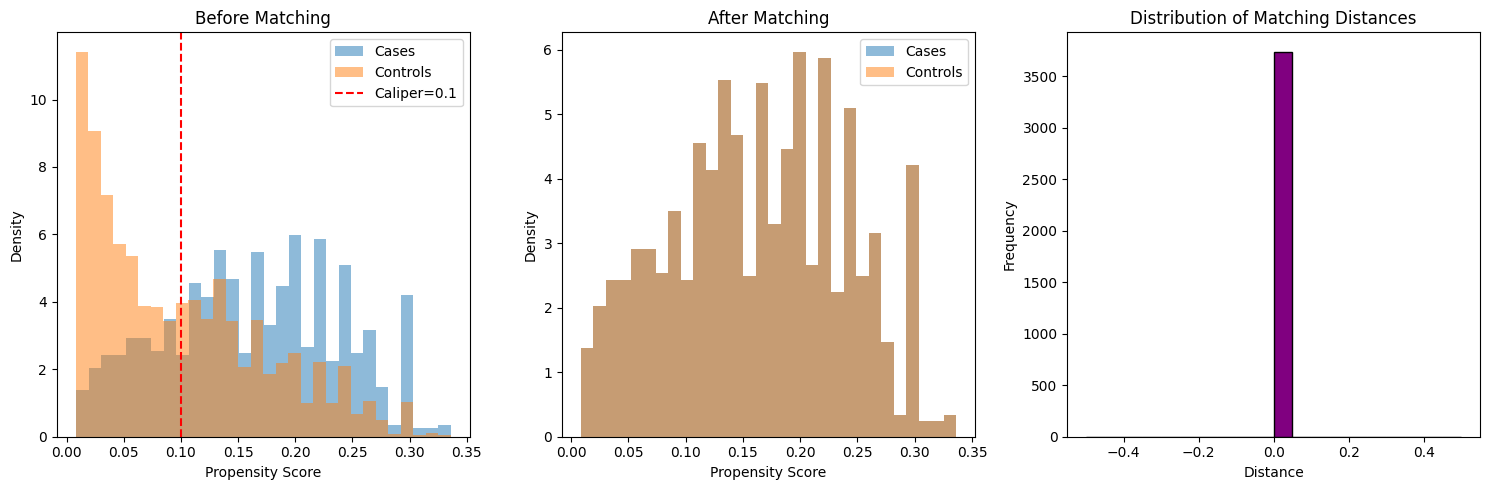

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# =================================================
# 1. 数据准备与分组
# =================================================
# 步骤0: 打印初始人数（基于最原始的数据）
initial_n = len(df)
print(f"=" * 65)
print(f"步骤0 - 初始人数: {initial_n:,} 人")
print("=" * 65)

# 创建二分类变量：是否发病
cataract_days_col = 'cataract_time_to_event_days'

if cataract_days_col not in df.columns:
    print(f"❌ 错误：列 '{cataract_days_col}' 不存在！")
else:
    # =================================================
    # 步骤1: 第一步就筛选掉早已发病的记录 (cataract_days < 183)
    # =================================================
    print("\n【步骤1 - 排除早已发病(<183 天)】")
    pre_step1_n = len(df)
    
    # 直接排除所有 cataract_days < 183 的记录
    df_step1 = df[~(df[cataract_days_col] < 183)].copy()
    
    after_step1_n = len(df_step1)
    removed_step1_n = pre_step1_n - after_step1_n
    
    print(f"排除前: {pre_step1_n:,} 人")
    print(f"排除后: {after_step1_n:,} 人")
    print(f"减少人数: {removed_step1_n:,} 人")
    print("=" * 65)
    
    # =================================================
    # 步骤1.5: 排除 alcohol_frequency_baseline 为空
    # =================================================
    print("\n【步骤1.5 - 排除 alcohol_frequency_baseline 缺失】")

    pre_step15_n = len(df_step1)

    if "alcohol_frequency_baseline" in df_step1.columns:
        n_missing_alcohol = df_step1["alcohol_frequency_baseline"].isna().sum()
        
        print(f"alcohol_frequency_baseline 缺失人数: {n_missing_alcohol:,}")
        
        df_step15 = df_step1.dropna(
            subset=["alcohol_frequency_baseline"]
        ).copy()
        
        after_step15_n = len(df_step15)
        removed_step15_n = pre_step15_n - after_step15_n
        
        print(f"筛选前: {pre_step15_n:,} 人")
        print(f"筛选后: {after_step15_n:,} 人")
        print(f"减少人数: {removed_step15_n:,} 人")
    else:
        print("⚠️  警告：未找到 alcohol_frequency_baseline 列，跳过该步骤")
        df_step15 = df_step1.copy()

    print("=" * 65)

    # =================================================
    
    # 步骤2: 去掉脂肪酸数据不完整的，创建 df_fa_complete
    # =================================================
    print("\n【步骤2 - 筛选脂肪酸数据完整的人群】")
    
    # 定义脂肪酸核心列
    fa_core_cols = ['fatty_acids_total', 'fatty_acids_n3', 'fatty_acids_n6',
                    'fatty_acids_pufa', 'fatty_acids_mufa', 'fatty_acids_sfa',
                    'fatty_acids_la', 'fatty_acids_dha']
    
    # 检查哪些列实际存在
    existing_fa_core = [col for col in fa_core_cols if col in df_step15.columns]
    
    if not existing_fa_core:
        print("⚠️  警告：未找到任何脂肪酸数据列！")
    
    pre_step2_n = len(df_step15)
    
    # 剔除脂肪酸数据不完整的记录 
    df_fa_complete = df_step15.dropna(subset=existing_fa_core).copy()
    
    after_step2_n = len(df_fa_complete)
    removed_step2_n = pre_step2_n - after_step2_n
    
    print(f"脂肪酸列: {existing_fa_core}")
    print(f"筛选前: {pre_step2_n:,} 人")
    print(f"筛选后: {after_step2_n:,} 人")
    print(f"减少人数: {removed_step2_n:,} 人")
    print("=" * 65)
    
    # =================================================
    # 步骤3: 筛选有效人群（只保留>180天和空值）
    # =================================================
    print("\n【步骤3 - 筛选最终有效人群】")
    print("保留: >=183天（晚期发病组）和空值（未发病组）")
    print("排除: <183天（早期发病组）")
    
    pre_step3_n = len(df_fa_complete)
    
    # 创建筛选掩码：只保留 >=183 或 空值
    valid_mask = (
        (df_fa_complete[cataract_days_col] >= 183) | 
        (df_fa_complete[cataract_days_col].isna())
    )
    df_fa_complete = df_fa_complete[valid_mask].copy()
    
    after_step3_n = len(df_fa_complete)
    removed_step3_n = pre_step3_n - after_step3_n
    
    print(f"筛选前: {pre_step3_n:,} 人")
    print(f"筛选后: {after_step3_n:,} 人")
    print(f"减少人数: {removed_step3_n:,} 人")
    print("=" * 65)
    
    # =================================================
    # 步骤4: 创建分组变量并准备PSM数据
    # =================================================
    print("\n【步骤4 - 创建分组变量】")
    
    # 创建二分类分组变量
    df_fa_complete['cataract_event'] = np.where(
        df_fa_complete[cataract_days_col] > 0,
        1,  # 发病组（>=183天）
        0   # 未发病组（空值）
    )
    
    # 复制数据用于PSM分析
    df_psm = df_fa_complete.copy()
    
    # 定义PSM分组变量
    df_psm['cataract_group'] = df_psm['cataract_event']
    
    # 检查分组样本量
    n_case = df_psm['cataract_group'].sum()
    n_control = (df_psm['cataract_group'] == 0).sum()
    
    print(f"发病组(>=183天): {n_case:,} 人")
    print(f"对照组(空值): {n_control:,} 人")
    print(f"总计: {len(df_psm):,} 人")
    print("=" * 65)
    
    # 统计发病组内时间分布
    days_series = df_psm.loc[df_psm['cataract_event'] == 1, cataract_days_col]
    early_count = (days_series < 183).sum()
    late_count = (days_series >= 183).sum()
    print(f"发病组内：早期(<183天)={early_count:,}，晚期(>=183天)={late_count:,}")
    print("=" * 65)
    
   # =================================================
    # 5. 倾向评分计算
    # =================================================
    # 匹配变量：年龄、性别和吸烟状态
    match_vars = ['age_baseline', 'sex', 'smoking_status_baseline']

    # 检查缺失值并清理
    missing_count = df_psm[match_vars].isnull().sum()
    if missing_count.any():
        print(f"\n⚠️  发现缺失值:\n{missing_count}")
        print("正在剔除含缺失值的记录...")
        clean_mask = df_psm[match_vars].notna().all(axis=1)
        pre_clean_n = len(df_psm)
        df_psm = df_psm[clean_mask].copy()
        after_clean_n = len(df_psm)
        removed_clean_n = pre_clean_n - after_clean_n
        print(f"清理前: {pre_clean_n:,} 人")
        print(f"清理后: {after_clean_n:,} 人")
        print(f"减少人数: {removed_clean_n:,} 人")

    # 对 df_psm 的 sex 列进行编码（关键修复）
    if df_psm['sex'].dtype == 'object':
        df_psm['sex'] = df_psm['sex'].astype(str).str.strip()
        df_psm['sex'] = df_psm['sex'].map({'Female': 0, 'Male': 1})
    elif isinstance(df_psm['sex'].dtype, pd.CategoricalDtype):
        df_psm['sex'] = df_psm['sex'].cat.codes

    # 提取特征和标签
    # X 是 年龄 + 性别 + 吸烟状态
    # y 是 是否发病
    X = df_psm[match_vars].copy()
    y = df_psm['cataract_group']

    # 标准化连续变量
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 逻辑回归
    ps_model = LogisticRegression(random_state=42, max_iter=1000)
    ps_model.fit(X_scaled, y)

    # 预测倾向评分（所有人）
    df_psm['propensity_score'] = ps_model.predict_proba(X_scaled)[:, 1]

    # 保存倾向评分模型信息
    model_info = {
        'variables': match_vars,
        'coefficients': dict(zip(['age', 'sex', 'smoking_status_baseline'], ps_model.coef_[0])),
        'intercept': ps_model.intercept_[0],
        'n_samples': len(df_psm)
    }

    print("\n【倾向评分模型】")
    print(f"模型系数: {model_info['coefficients']}")
    print(f"模型截距: {model_info['intercept']:.4f}")
    print(f"模型样本数: {model_info['n_samples']:,}")

    # 计算OR值
    import math
    print("\n【OR值解读】")
    for var, coef in model_info['coefficients'].items():
        or_value = math.exp(coef)
        print(f"{var}: OR={or_value:.2f}")
    # =================================================
    # 6. 1:1最近邻匹配（卡尺0.1）
    # =================================================
    case_df = df_psm[df_psm['cataract_group'] == 1].copy()
    control_df = df_psm[df_psm['cataract_group'] == 0].copy()
    
    print("\n" + "=" * 65)
    print("【开始1:1最近邻匹配】")
    print(f"卡尺值: 0.1")
    print("=" * 65)
    
    # 计算距离矩阵
    case_ps = case_df['propensity_score'].values.reshape(-1, 1)
    control_ps = control_df['propensity_score'].values.reshape(-1, 1)
    distances = cdist(case_ps, control_ps, metric='euclidean')
    
    # 执行匹配
    matched_pairs = []
    used_controls = set()
    
    for i, case_id in enumerate(case_df['participant_id']):
        case_score = case_df.iloc[i]['propensity_score']
        
        # 找到最近邻
        sorted_indices = np.argsort(distances[i])
        for j in sorted_indices:
            control_id = control_df.iloc[j]['participant_id']
            
            if control_id not in used_controls:
                distance = distances[i, j]
                # 卡尺判断
                if abs(case_score - control_df.iloc[j]['propensity_score']) < 0.1:
                    matched_pairs.append({
                        'case_id': case_id,
                        'control_id': control_id,
                        'distance': distance,
                        'case_ps': case_score,
                        'control_ps': control_df.iloc[j]['propensity_score']
                    })
                    used_controls.add(control_id)
                    break
    
    print(f"成功匹配对数: {len(matched_pairs)}")
    
    if len(matched_pairs) < len(case_df):
        print(f"⚠️  警告: 有 {len(case_df) - len(matched_pairs)} 例病例未找到匹配对照")
    
    # 创建匹配数据集
    matched_case_ids = [p['case_id'] for p in matched_pairs]
    matched_control_ids = [p['control_id'] for p in matched_pairs]
    
    df_matched = df_psm[df_psm['participant_id'].isin(matched_case_ids + matched_control_ids)].copy()
    
    # 添加匹配标识
    df_matched['matched_pair_id'] = df_matched['participant_id'].map(
        {**{p['case_id']: i for i, p in enumerate(matched_pairs)},
         **{p['control_id']: i for i, p in enumerate(matched_pairs)}}
    )
    df_matched['is_case'] = df_matched['participant_id'].isin(matched_case_ids).astype(int)
    
    print(f"匹配后总样本数: {len(df_matched):,}")
    print(f"病例组: {len(matched_case_ids):,}")
    print(f"对照组: {len(matched_control_ids):,}")
    print("=" * 65)
    
    # =================================================
    # 7. 匹配质量评估（SMD）
    # =================================================
    print("\n" + "=" * 65)
    print("【匹配质量评估 - 标准化均数差（SMD）】")
    print("=" * 65)
    
    def calculate_smd(group1, group2, continuous=True):
        """计算标准化均数差"""
        if continuous:
            mean_diff = group1.mean() - group2.mean()
            pooled_sd = np.sqrt(((len(group1)-1)*group1.std()**2 + 
                                 (len(group2)-1)*group2.std()**2) / 
                                (len(group1)+len(group2)-2))
            return abs(mean_diff) / pooled_sd
        else:
            p1 = group1.mean()
            p2 = group2.mean()
            return abs(p1 - p2) / np.sqrt((p1*(1-p1) + p2*(1-p2)) / 2)
    
    smd_results = []
    for var in match_vars:
        # 匹配前
        case_before = df_psm[df_psm['cataract_group'] == 1][var]
        control_before = df_psm[df_psm['cataract_group'] == 0][var]
        smd_before = calculate_smd(case_before, control_before, 
                                   continuous=(var != 'sex'))
        
        # 匹配后
        case_after = df_matched[df_matched['is_case'] == 1][var]
        control_after = df_matched[df_matched['is_case'] == 0][var]
        smd_after = calculate_smd(case_after, control_after, 
                                  continuous=(var != 'sex'))
        
        print(f"{var}:")
        print(f" 匹配前SMD: {smd_before:.4f} {'✅' if smd_before < 0.1 else '❌'}")
        print(f" 匹配后SMD: {smd_after:.4f} {'✅' if smd_after < 0.1 else '❌'}")
        
        smd_results.append({
            'variable': var,
            'smd_before': smd_before,
            'smd_after': smd_after
        })
    
    # =================================================
    # 8. 亚组分析（保持不变）
    # =================================================
    # 按年龄分层
    print("\n" + "=" * 65)
    print("【亚组分析 - 按年龄分层】")
    print("=" * 65)
    
    df_matched['age_group'] = pd.cut(
        df_matched['age_baseline'], 
        bins=[0, 50, 60, 70, 100], 
        labels=['<50', '50-59', '60-69', '≥70']
    )
    
    age_subgroup = []
    for age_grp, group in df_matched.groupby('age_group'):
        n_case = group['is_case'].sum()
        n_control = (group['is_case'] == 0).sum()
        ratio = n_case / n_control if n_control > 0 else np.inf
        
        print(f"{age_grp}岁组: 病例{n_case:,}，对照{n_control:,}，比例{ratio:.2f}")
        
        age_subgroup.append({
            'age_group': str(age_grp),
            'n_cases': n_case,
            'n_controls': n_control,
            'ratio': ratio
        })
    
    # 按性别分层
    print("\n" + "=" * 65)
    print("【亚组分析 - 按性别分层】")
    print("=" * 65)
    
    sex_subgroup = []
    for sex_val, group in df_matched.groupby('sex'):
        sex_label = 'Female' if sex_val == 0 else 'Male'
        n_case = group['is_case'].sum()
        n_control = (group['is_case'] == 0).sum()
        ratio = n_case / n_control if n_control > 0 else np.inf
        
        print(f"{sex_label}: 病例{n_case:,}，对照{n_control:,}，比例{ratio:.2f}")
        
        sex_subgroup.append({
            'sex': sex_label,
            'n_cases': n_case,
            'n_controls': n_control,
            'ratio': ratio
        })
    
    # =================================================
    # 9. 可视化（保持不变）
    # =================================================
    plt.figure(figsize=(15, 5))
    
    # 倾向评分分布  
    plt.subplot(1, 3, 1)
    plt.hist(df_psm[df_psm['cataract_group']==1]['propensity_score'], 
             alpha=0.5, label='Cases', bins=30, density=True)
    plt.hist(df_psm[df_psm['cataract_group']==0]['propensity_score'], 
             alpha=0.5, label='Controls', bins=30, density=True)
    plt.axvline(x=0.1, color='red', linestyle='--', label='Caliper=0.1')
    plt.title("Before Matching")
    plt.xlabel("Propensity Score")
    plt.ylabel("Density")
    plt.legend()
    
    # 匹配后分布
    plt.subplot(1, 3, 2)
    plt.hist(df_matched[df_matched['is_case']==1]['propensity_score'], 
             alpha=0.5, label='Cases', bins=30, density=True)
    plt.hist(df_matched[df_matched['is_case']==0]['propensity_score'], 
             alpha=0.5, label='Controls', bins=30, density=True)
    plt.title("After Matching")
    plt.xlabel("Propensity Score")
    plt.ylabel("Density")
    plt.legend()
    
    # 匹配对距离分布
    distances = [p['distance'] for p in matched_pairs]
    plt.subplot(1, 3, 3)
    plt.hist(distances, bins=20, color='purple', edgecolor='black')
    plt.title("Distribution of Matching Distances")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

## 数据匹配结果

In [15]:
# -*- coding: utf-8 -*- 
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency, fisher_exact
from IPython.display import display

# -------------------------
# 辅助函数
# -------------------------
# ===============================
# ★ 新增：Z-score 标准化
# ===============================
def zscore_by_ref(series, mean, std):
    if std == 0 or np.isnan(std):
        return series * np.nan
    return (series - mean) / std
def format_p(p):
    if p is None or (isinstance(p, float) and np.isnan(p)):
        return ""
    return "<0.001" if p < 0.001 else f"{p:.3f}"

def fmt_mean_sd(series):
    series = series.dropna()
    if len(series) == 0:
        return ""
    return f"{series.mean():.2f} ± {series.std(ddof=1):.2f}"

def fmt_n_pct(n, total):
    if total == 0 or np.isnan(total):
        return f"{int(n)} (0.00%)"
    return f"{int(n)} ({n/total*100:.2f}%)"

def p_value_continuous(x1, x2):
    x1 = x1.dropna()
    x2 = x2.dropna()
    if len(x1)<2 or len(x2)<2:
        return np.nan
    try:
        _, p = ttest_ind(x1, x2, equal_var=False, nan_policy='omit')
        return p
    except:
        return np.nan

def p_value_categorical(tab):
    if tab.empty:
        return np.nan
    if tab.shape[0]==2 and tab.shape[1]==2:
        try:
            return fisher_exact(tab.values.astype(int))[1]
        except:
            return chi2_contingency(tab.values.astype(int))[1]
    else:
        try:
            return chi2_contingency(tab.values.astype(int))[1]
        except:
            return np.nan

# -------------------------
# 构建 Table1
# -------------------------
def build_table1_psm(df_before, df_after,
                     group_before='cataract_group',
                     group_after='is_case',
                     group_labels=('对照组','白内障组')):

    # ---------- 去除重复列 ----------
    df_before = df_before.loc[:, ~df_before.columns.duplicated()]
    df_after = df_after.loc[:, ~df_after.columns.duplicated()]

    rows = []

    # ===============================
    # ★ 修改点 1：education_baseline 统一重编码
    # ===============================
    for df in [df_before, df_after]:
        if 'education_baseline' in df.columns:
            df['education_bin'] = df['education_baseline'].apply(
                lambda x: 1 if x == 1 else 0
            )
    # ↑ education_bin：
    #   1 = College / University
    #   0 = Others（包括 0 / 2 / 3 / NaN）

    # ===============================
    # ★ 修改点 2：Smoking status 统一重编码
    # ===============================
    for df in [df_before, df_after]:
        if 'smoker' in df.columns:
            df['Smoking status'] = df['smoker'].apply(
                lambda x: 1 if x == 1 else 0
            )
    # ↑ Smoking status：
    #   1 = Never
    #   qita  = Current

    # ===============================
    # ★ 修改点 3：Alcohol use 统一重编码
    # ===============================
    for df in [df_before, df_after]:
        if 'alcohol_frequency_baseline' in df.columns:
            df['Alcohol use'] = df['alcohol_frequency_baseline'].apply(
                lambda x: 1 if x == 1 else 0
            )
    # ↑ Smoking status：
    #   1 = Never/occasional
    #   qita  = Frequent

    # ===============================
    # ★ 新增：AMD / Glaucoma / Diabetes 统一二分类重编码
    # ===============================
    for df in [df_before, df_after]:

        if 'amd_baseline' in df.columns:
            df['amd'] = df['amd_baseline'].apply(
                lambda x: 0 if x == 0 else 1
            )

        if 'glaucoma_baseline' in df.columns:
            df['glaucoma'] = df['glaucoma_baseline'].apply(
                lambda x: 1 if x == 1 else 0
            )

        if 'diabetic_retinopathy_baseline' in df.columns:
            df['diabetes'] = df['diabetic_retinopathy_baseline'].apply(
                lambda x: 1 if x == 1 else 0
        )
    # ---------- 连续变量 ----------
    continuous_vars = {
        'age_baseline': 'Age in years, mean (SD)',
        'bmi_baseline': 'BMI (SD)',
        'cataract_time_to_event_days': '白内障发病时间（天）'
    }

    # ---------- 分类变量 ----------
    categorical_vars = {
        'sex': {0:'Female',1:'Male'},
        'Ethnicity': {'White':'White', 'Others':'Others'},  # 稍后生成
        'education_bin': {1:'College/University', 0:'Others'},
        'Smoking status': {0:'Never',1:'Current'},
        'Alcohol use': {1:'Never/occasional',0:'Frequent'},
        'amd': {0:'No',1:'Yes'},
        'glaucoma': {0:'No',1:'Yes'},
        'diabetes': {0:'No',1:'Yes'},
        'hypertension_baseline': {0:'No',1:'Yes'},
        'heart_disease_composite': {0:'No',1:'Yes'},
        'depression_baseline': {0:'No',1:'Yes'}
    }

    # ------------------- 处理连续变量 -------------------
    for col, label in continuous_vars.items():
        x0 = df_before[df_before[group_before]==0][col] if col in df_before.columns else pd.Series(dtype=float)
        x1 = df_before[df_before[group_before]==1][col] if col in df_before.columns else pd.Series(dtype=float)
        p_pre = p_value_continuous(x0, x1)

        y0 = df_after[df_after[group_after]==0][col] if col in df_after.columns else pd.Series(dtype=float)
        y1 = df_after[df_after[group_after]==1][col] if col in df_after.columns else pd.Series(dtype=float)
        p_post = p_value_continuous(y0, y1)

        rows.append([
            f"{label}",
            fmt_mean_sd(x0), fmt_mean_sd(x1), format_p(p_pre),
            fmt_mean_sd(y0), fmt_mean_sd(y1), format_p(p_post)
        ])

    # ------------------- 生成 Ethnicity 列 -------------------
    for df in [df_before, df_after]:
        if 'ethnic' in df.columns:
            df['Ethnicity'] = df['ethnic'].apply(lambda x: 'White' if x==1 else 'Others')
        else:
            df['Ethnicity'] = np.nan

    # ------------------- 处理分类变量 -------------------
    for col, mapping in categorical_vars.items():
        if col not in df_before.columns and col not in df_after.columns:
            continue

        tab_before = pd.crosstab(df_before[col], df_before[group_before]) if col in df_before.columns else pd.DataFrame()
        tab_after = pd.crosstab(df_after[col], df_after[group_after]) if col in df_after.columns else pd.DataFrame()

        # 计算 P 值
        p_pre = p_value_categorical(tab_before)
        p_post = p_value_categorical(tab_after)

        # 添加变量行
        rows.append([f"{col}", '', '', format_p(p_pre), '', '', format_p(p_post)])

        total0_pre = (df_before[group_before]==0).sum()
        total1_pre = (df_before[group_before]==1).sum()
        total0_post = (df_after[group_after]==0).sum()
        total1_post = (df_after[group_after]==1).sum()

        for val, label in mapping.items():
            n0_pre = tab_before.loc[val,0] if (0 in tab_before.columns and val in tab_before.index) else 0
            n1_pre = tab_before.loc[val,1] if (1 in tab_before.columns and val in tab_before.index) else 0
            n0_post = tab_after.loc[val,0] if (0 in tab_after.columns and val in tab_after.index) else 0
            n1_post = tab_after.loc[val,1] if (1 in tab_after.columns and val in tab_after.index) else 0
            rows.append([
                f"  {label}",
                fmt_n_pct(n0_pre,total0_pre), fmt_n_pct(n1_pre,total1_pre), '',
                fmt_n_pct(n0_post,total0_post), fmt_n_pct(n1_post,total1_post), ''
            ])

    # ------------------- 添加脂肪酸指标 -------------------
    fa_core_cols = ['fatty_acids_total', 'fatty_acids_n3', 'fatty_acids_n6',
                    'fatty_acids_pufa', 'fatty_acids_mufa', 'fatty_acids_sfa',
                    'fatty_acids_la', 'fatty_acids_dha']
    for col in fa_core_cols:
        if col in df_before.columns or col in df_after.columns:
            x0 = df_before[df_before[group_before]==0][col] if col in df_before.columns else pd.Series(dtype=float)
            x1 = df_before[df_before[group_before]==1][col] if col in df_before.columns else pd.Series(dtype=float)
            p_pre = p_value_continuous(x0, x1)

            y0 = df_after[df_after[group_after]==0][col] if col in df_after.columns else pd.Series(dtype=float)
            y1 = df_after[df_after[group_after]==1][col] if col in df_after.columns else pd.Series(dtype=float)
            p_post = p_value_continuous(y0, y1)

            rows.append([
                f"{col}",
                fmt_mean_sd(x0), fmt_mean_sd(x1), format_p(p_pre),
                fmt_mean_sd(y0), fmt_mean_sd(y1), format_p(p_post)
            ])
    # ------------------- 添加血脂指标 -------------------
    lipid_cols = ['total_cholesterol', 'ldl_cholesterol', 'hdl_cholesterol', 'triglycerides']
    for col in lipid_cols:
        if col in df_before.columns or col in df_after.columns:
            x0 = df_before[df_before[group_before]==0][col] if col in df_before.columns else pd.Series(dtype=float)
            x1 = df_before[df_before[group_before]==1][col] if col in df_before.columns else pd.Series(dtype=float)
            p_pre = p_value_continuous(x0, x1)

            y0 = df_after[df_after[group_after]==0][col] if col in df_after.columns else pd.Series(dtype=float)
            y1 = df_after[df_after[group_after]==1][col] if col in df_after.columns else pd.Series(dtype=float)
            p_post = p_value_continuous(y0, y1)

            rows.append([
                f"{col}",
                fmt_mean_sd(x0), fmt_mean_sd(x1), format_p(p_pre),
                fmt_mean_sd(y0), fmt_mean_sd(y1), format_p(p_post)
            ])
    
    columns = [
        '变量',
        f'匹配前 {group_labels[0]}', f'匹配前 {group_labels[1]}', 'P值',
        f'匹配后 {group_labels[0]}', f'匹配后 {group_labels[1]}', 'P值'
    ]
    table_df = pd.DataFrame(rows, columns=columns)
    return table_df

# -------------------------
# 生成 Table1 并显示
# -------------------------
table1 = build_table1_psm(df_psm, df_matched,
                          group_before='cataract_group',
                          group_after='is_case',
                          group_labels=('对照组','白内障组'))

display(table1)
table1.to_excel("Table1_complete_with_FA_and_Ethnicity.xlsx", index=False)
print("✅ Table1 已保存为 Table1_complete_with_FA_and_Ethnicity.xlsx")


,变量,匹配前 对照组,匹配前 白内障组,P值,匹配后 对照组,匹配后 白内障组,P值
0,"Age in years, mean (SD)",56.25 ± 8.08,62.39 ± 5.76,<0.001,62.39 ± 5.76,62.39 ± 5.76,1.000
1,BMI (SD),27.45 ± 4.81,28.05 ± 4.96,<0.001,27.49 ± 4.65,28.05 ± 4.96,<0.001
2,白内障发病时间（天）,,2537.82 ± 1101.77,,,2537.82 ± 1101.77,
3,sex,,,<0.001,,,1.000
4,Female,16935 (53.39%),2197 (58.74%),,2197 (58.74%),2197 (58.74%),
5,Male,14784 (46.61%),1543 (41.26%),,1543 (41.26%),1543 (41.26%),
6,Ethnicity,,,0.009,,,<0.001
7,White,28980 (91.36%),3369 (90.08%),,3554 (95.03%),3369 (90.08%),
8,Others,2739 (8.64%),371 (9.92%),,186 (4.97%),371 (9.92%),
9,education_bin,,,<0.001,,,0.004


✅ Table1 已保存为 Table1_complete_with_FA_and_Ethnicity.xlsx


## Cox 分析

In [16]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from statsmodels.duration.hazard_regression import PHReg
import warnings

warnings.filterwarnings("ignore")

# ======================================================
# 1. 脂肪酸变量映射
# ======================================================
fa_analysis_vars = [
    "Total fatty acid",
    "Omega 3 fatty acid",
    "Omega 6 fatty acid",
    "Polyunsaturated fatty acids",
    "Monounsaturated fatty acids",
    "Saturated fatty acids",
    "Linoleic acid",
    "Docosahexaenoic acid"
]

actual_fa_columns = [
    "fatty_acids_total",
    "fatty_acids_n3",
    "fatty_acids_n6",
    "fatty_acids_pufa",
    "fatty_acids_mufa",
    "fatty_acids_sfa",
    "fatty_acids_la",
    "fatty_acids_dha"
]

# ======================================================
# 2. ethnic_background → dummy 编码（只做一次）
# ======================================================
ethnic_dummies = pd.get_dummies(
    df_matched["ethnic_background"],
    prefix="ethnic",
    drop_first=True
)

df_matched = pd.concat([df_matched, ethnic_dummies], axis=1)
ethnic_vars = ethnic_dummies.columns.tolist()

# ======================================================
# 3. 定义三套模型协变量
# ======================================================
# Model 1
model1_vars = ["age_baseline", "sex", "ethnic_background"]

# Model 2
model2_vars = model1_vars + [
    # "bmi_baseline",
    "alcohol_frequency_baseline",
    "smoking_status_baseline",
    "education_baseline"
]

# Model 3
model3_vars = model2_vars + [
    "diabetes_baseline",
    "hypertension_baseline",
    "heart_disease_composite",
    
    # "amd_baseline",
    "glaucoma_baseline"
]

all_models = {
    "Model1": model1_vars,
    "Model2": model2_vars,
    "Model3": model3_vars
}

# ======================================================
# 4. 构造生存时间 & 结局
# ======================================================
df_matched["cataract_group"] = df_matched["cataract_group"].fillna(0)

max_followup = df_matched["cataract_time_to_event_days"].max()

df_matched["time"] = df_matched["cataract_time_to_event_days"]
df_matched.loc[df_matched["cataract_group"] == 0, "time"] = max_followup

df_matched["status"] = df_matched["cataract_group"].astype(int)

# ======================================================
# 5. Cox 回归（连续脂肪酸）
# ======================================================
results_all = []

# 所有模型可能用到的协变量（防 KeyError 的关键）
all_covariates = list(
    set(model1_vars + model2_vars + model3_vars)
)

for fa_var, actual_col in zip(fa_analysis_vars, actual_fa_columns):

    # 构造 Cox 数据
    cox_data = df_matched[
        [actual_col, "time", "status"] + all_covariates
    ].dropna()

    print(f"\n{fa_var} - 总计用于 Cox 分析: {len(cox_data):,} 人")

    if len(cox_data) < 20:
        print("样本量不足，跳过")
        continue

    for model_name, model_vars in all_models.items():

        # 防止变量缺失
        exog_vars = [actual_col] + [
            v for v in model_vars if v in cox_data.columns
        ]

        exog = cox_data[exog_vars].astype(float)
        time = cox_data["time"].values
        status = cox_data["status"].values

        model = PHReg(time, exog, status=status)
        result = model.fit()

        beta = result.params[0]
        se = result.bse[0]

        HR = np.exp(beta)
        CI_l = np.exp(beta - 1.96 * se)
        CI_u = np.exp(beta + 1.96 * se)
        p = result.pvalues[0]

        results_all.append({
            "Variable": fa_var,
            "Model": model_name,
            "HR": HR,
            "CI": f"{CI_l:.2f}-{CI_u:.2f}",
            "P_value": p,
            "N": len(cox_data)
        })

        print(
            f"{fa_var} | {model_name}: "
            f"N={len(cox_data)}, "
            f"HR={HR:.2f} ({CI_l:.2f}-{CI_u:.2f}), "
            f"p={p:.4g}"
        )

# ======================================================
# 6. 保存结果
# ======================================================
df_results = pd.DataFrame(results_all)
df_results.to_excel("Cox_matched_results_models.xlsx", index=False)

print("\n✅ Cox 分析完成，结果已保存：Cox_matched_results_models.xlsx")



Total fatty acid - 总计用于 Cox 分析: 7,480 人
Total fatty acid | Model1: N=7480, HR=0.98 (0.95-1.01), p=0.2693
Total fatty acid | Model2: N=7480, HR=0.98 (0.95-1.02), p=0.3551
Total fatty acid | Model3: N=7480, HR=1.00 (0.96-1.03), p=0.8656

Omega 3 fatty acid - 总计用于 Cox 分析: 7,480 人
Omega 3 fatty acid | Model1: N=7480, HR=0.97 (0.93-1.00), p=0.03505
Omega 3 fatty acid | Model2: N=7480, HR=0.97 (0.94-1.00), p=0.09478
Omega 3 fatty acid | Model3: N=7480, HR=0.97 (0.94-1.01), p=0.1197

Omega 6 fatty acid - 总计用于 Cox 分析: 7,480 人
Omega 6 fatty acid | Model1: N=7480, HR=0.96 (0.93-0.99), p=0.009228
Omega 6 fatty acid | Model2: N=7480, HR=0.96 (0.93-0.99), p=0.01782
Omega 6 fatty acid | Model3: N=7480, HR=0.99 (0.96-1.03), p=0.6669

Polyunsaturated fatty acids - 总计用于 Cox 分析: 7,480 人
Polyunsaturated fatty acids | Model1: N=7480, HR=0.95 (0.92-0.99), p=0.004818
Polyunsaturated fatty acids | Model2: N=7480, HR=0.96 (0.93-0.99), p=0.01236
Polyunsaturated fatty acids | Model3: N=7480, HR=0.99 (0.95-1.02

## 亚组分析

最终纳入的协变量: ['age_baseline', 'sex', 'ethnic_background', 'bmi_baseline', 'alcohol_frequency_baseline', 'smoking_status_baseline', 'education_baseline', 'diabetes_baseline', 'hypertension_baseline', 'heart_disease_composite', 'glaucoma_baseline']
建模样本量: 7262
                      Results: PHReg
Model:                    PH Reg      Sample size:     7262
Dependent variable:       y           Num. events:     3616
Ties:                     Breslow                          
-----------------------------------------------------------
     log HR  log HR SE    HR      t    P>|t|  [0.025 0.975]
-----------------------------------------------------------
x1   0.0548  81488.0906 1.0564  0.0000 1.0000 0.0000    inf
x2  -0.0802 238931.9619 0.9229 -0.0000 1.0000 0.0000    inf
x3   0.0028 341657.0761 1.0028  0.0000 1.0000 0.0000    inf
x4   0.0231 430770.8610 1.0234  0.0000 1.0000 0.0000    inf
x5  -0.0038   6779.7130 0.9962 -0.0000 1.0000 0.0000    inf
x6  -0.0448      0.0356 0.9562 -1.2599 0.2077 0

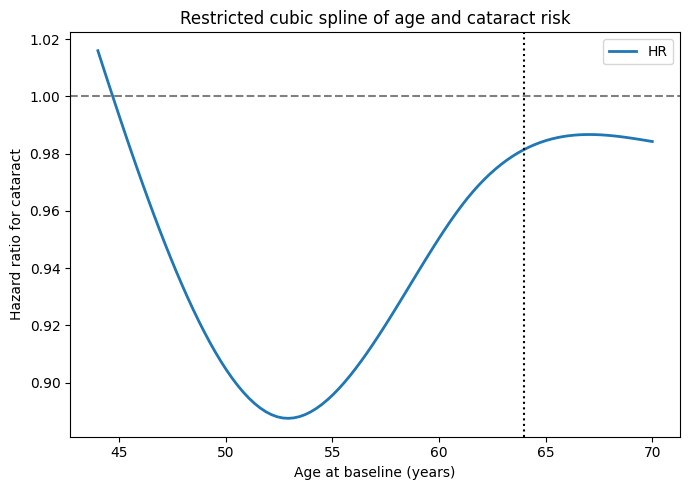

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from statsmodels.duration.hazard_regression import PHReg
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# ======================================================
# 1. 基础设置
# ======================================================
df_used = df_matched
time_col = "cataract_time_to_event_days"
status_col = "cataract_event"
age_col = "age_baseline"

# ======================================================
# 2. 构造 time / status
# =====================================================
df_used["cataract_time_to_event_days"] = df_used[time_col].fillna(9999)  # 没有随访列用0填充
# ======================================================
# 2. 协变量选择（严格按你的要求）
# ======================================================
# 三个模型的变量组合
def update_vars(var_list):
    # 过滤掉 df_used 中不存在的列
    return [v for v in var_list if v in df_used.columns]

m1_vars = update_vars(["age_baseline", "sex", "ethnic_background"])
m2_vars = update_vars(m1_vars + ["bmi_baseline", "alcohol_frequency_baseline",
                                 "smoking_status_baseline", "education_baseline"])
m3_vars = update_vars(m2_vars + ["diabetes_baseline", "hypertension_baseline",
                                 "heart_disease_composite", "glaucoma_baseline"])

# 选择你要建的模型
covariates = m3_vars
print("最终纳入的协变量:", covariates)

# ======================================================
# 3. RCS(age)
# ======================================================
n_knots = 4
rcs = dmatrix(f"cr({age_col}, df={n_knots})", df_used, return_type="dataframe")
rcs_cols = [c for c in rcs.columns if c.lower() != "intercept"]

# ======================================================
# 4. 构造协变量矩阵
# ======================================================
cov_df = df_used[covariates].copy()

# bool → float
for c in cov_df.columns:
    if cov_df[c].dtype == "bool":
        cov_df[c] = cov_df[c].astype(float)

# ======================================================
# 5. 合并设计矩阵
# ======================================================
exog_df = pd.concat(
    [rcs[rcs_cols].reset_index(drop=True),
     cov_df.reset_index(drop=True)],
    axis=1
)

# ======================================================
# 6. 拼接 time / status，清理 NaN
# ======================================================
full_df = pd.concat(
    [df_used[[time_col, status_col]].reset_index(drop=True),
     exog_df.reset_index(drop=True)],
    axis=1
).replace([np.inf, -np.inf], np.nan).dropna()

print("建模样本量:", len(full_df))

X = full_df[exog_df.columns].to_numpy(dtype=float)
time = full_df[time_col].to_numpy(dtype=float)
status = full_df[status_col].to_numpy(dtype=int)

# ======================================================
# 7. Cox (PHReg)
# ======================================================
model = PHReg(endog=time, exog=X, status=status)
result = model.fit(disp=False)
print(result.summary())

# ======================================================
# 8. P for overall / nonlinear
# ======================================================
exog_cols = exog_df.columns.tolist()
spline_idx = [exog_cols.index(c) for c in rcs_cols]

beta = result.params
cov = result.cov_params()

# overall
b_all = beta[spline_idx]
cov_all = cov[np.ix_(spline_idx, spline_idx)]
wald_all = b_all.T @ np.linalg.inv(cov_all) @ b_all
p_overall = 1 - stats.chi2.cdf(wald_all, df=len(b_all))

# nonlinear
idx_nl = spline_idx[1:]
b_nl = beta[idx_nl]
cov_nl = cov[np.ix_(idx_nl, idx_nl)]
wald_nl = b_nl.T @ np.linalg.inv(cov_nl) @ b_nl
p_nonlinear = 1 - stats.chi2.cdf(wald_nl, df=len(b_nl))

print(f"P overall   = {p_overall:.3e}")
print(f"P nonlinear = {p_nonlinear:.3e}")

# ---------- 11. 修正版 HR 曲线 ----------
age_seq = np.linspace(
    df_used[age_col].quantile(0.01),
    df_used[age_col].quantile(0.99),
    100
)

# spline_pred
spline_pred = dmatrix(f"cr({age_col}, df={n_knots})", {age_col: age_seq}, return_type="dataframe")

# spline_ref: 用中位数附近生成两个点，避免单值报错
median_val = df_used[age_col].median()
spline_ref_values = np.array([median_val - 0.01, median_val + 0.01])
spline_ref = dmatrix(f"cr({age_col}, df={n_knots})", {age_col: spline_ref_values}, return_type="dataframe")
spline_ref = spline_ref.mean(axis=0).to_frame().T  # 均值作为参考

# 补齐 rcs_cols（与训练时一致）
for c in rcs_cols:
    if c not in spline_pred.columns:
        spline_pred[c] = 0.0
    if c not in spline_ref.columns:
        spline_ref[c] = 0.0

spline_pred = spline_pred[rcs_cols].values
spline_ref  = spline_ref[rcs_cols].values

diff = spline_pred - spline_ref
lin_pred = diff @ b_all
se = np.sqrt(np.sum((diff @ cov_all) * diff, axis=1))

hr = np.exp(lin_pred)
lower = np.exp(lin_pred - 1.96 * se)
upper = np.exp(lin_pred + 1.96 * se)

plt.figure(figsize=(7, 5))
plt.plot(age_seq, hr, lw=2, label='HR')
plt.fill_between(age_seq, lower, upper, alpha=0.25)
plt.axhline(1, linestyle='--', color='gray')
plt.axvline(median_val, linestyle=':', color='black')
plt.xlabel("Age at baseline (years)")
plt.ylabel("Hazard ratio for cataract")
plt.title("Restricted cubic spline of age and cataract risk")
plt.legend()
plt.tight_layout()
plt.show()




In [18]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from statsmodels.duration.hazard_regression import PHReg
import warnings
warnings.filterwarnings("ignore")

# -----------------------
# 帮助函数：从候选列名中找到存在的那一列
# -----------------------
def find_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

# -----------------------
# 先检查 df_matched 是否存在
# -----------------------
try:
    df_matched
except NameError:
    raise RuntimeError("未找到 df_matched，请先准备 df_matched 后再运行此脚本。")

df = df_matched  # 简短引用

# -----------------------
# 识别关键列（尽量兼容多写法）
# -----------------------
age_col = find_col(df, ["age_baseline", "age_bl", "age"])
sex_col = find_col(df, ["sex", "sex_baseline", "sex_bl"])
smoke_col = find_col(df, ["smoking_status_baseline", "csmoking_bl", "smoking_bl", "smoking_status"])
time_col = find_col(df, ["time", "cataract_time_to_event_days", "cataract_days", "followup_duration_cataract"])
status_col = find_col(df, ["status", "cataract_group", "incident_cataract", "cataract_incident"])

print("自动识别到列：")
print(f" age_col = {age_col}")
print(f" sex_col = {sex_col}")
print(f" smoke_col = {smoke_col}")
print(f" time_col = {time_col}")
print(f" status_col = {status_col}")

if age_col is None:
    raise RuntimeError("找不到年龄列，请确保存在 age_baseline / age_bl / age 之类的列。")
if sex_col is None:
    raise RuntimeError("找不到性别列，请确保存在 sex / sex_baseline 等列。")
if smoke_col is None:
    raise RuntimeError("找不到吸烟列，请确保存在 smoking_status_baseline / csmoking_bl 等列。")
if time_col is None or status_col is None:
    raise RuntimeError("找不到生存时间或终点列，请确保包含 time 或 cataract_time_to_event_days，以及 cataract_group/incident_cataract 等。")

# -----------------------
# 选择脂肪酸（排除 Total fatty acid 和 Saturated fatty acids）
# -----------------------
fa_analysis_vars = [
    "Omega 3 fatty acid",
    "Omega 6 fatty acid",
    "Polyunsaturated fatty acids",
    "Monounsaturated fatty acids",
    "Linoleic acid",
    "Docosahexaenoic acid"
]

actual_fa_columns_candidates = {
    "Omega 3 fatty acid": ["fatty_acids_n3", "n3fa", "n3_fa"],
    "Omega 6 fatty acid": ["fatty_acids_n6", "n6fa", "n6_fa"],
    "Polyunsaturated fatty acids": ["fatty_acids_pufa", "pufa"],
    "Monounsaturated fatty acids": ["fatty_acids_mufa", "mufa"],
    "Linoleic acid": ["fatty_acids_la", "la"],
    "Docosahexaenoic acid": ["fatty_acids_dha", "dha"]
}

# map actual columns,报错提示哪些缺失
actual_fa_columns = []
missing_fa = []
for fa in fa_analysis_vars:
    col = find_col(df, actual_fa_columns_candidates[fa])
    if col:
        actual_fa_columns.append(col)
    else:
        actual_fa_columns.append(None)
        missing_fa.append(fa)

if missing_fa:
    print("提示：下列脂肪酸在数据中未找到对应列，将在分析中跳过：", missing_fa)

# -----------------------
# 准备 time/status 列（统一命名）
# -----------------------
df = df.copy()
df["time"] = df[time_col].astype(float)
# 将状态转换为 0/1
status_series = df[status_col]
# 若 status 是布尔/数字，尽量转换为 0/1
if status_series.dropna().dtype.kind in "biu" or pd.api.types.is_bool_dtype(status_series):
    df["status"] = status_series.astype(int)
else:
    # 若为字符串，请尝试映射常见字符
    status_map = {}
    uniq = status_series.dropna().unique().tolist()
    for u in uniq:
        if str(u).lower() in ("yes", "y", "1", "true", "t", "case", "incident"):
            status_map[u] = 1
        elif str(u).lower() in ("no", "n", "0", "false", "f", "control"):
            status_map[u] = 0
    if status_map:
        df["status"] = status_series.map(status_map)
    else:
        # 不能自动映射时直接尝试强制转换为 int（可能失败）
        try:
            df["status"] = status_series.astype(int)
        except:
            raise RuntimeError(f"无法识别 status 列 ({status_col}) 的取值，请手动检查并转换为 0/1。")

# -----------------------
# 构造/确认亚组列
# -----------------------
# age_group / age_bin
df["age_group"] = np.where(df[age_col] > 53, ">=53", "<53")
df["age_bin"] = np.where(df[age_col] > 53, 1, 0)

# sex_group / sex_bin
# 尝试把 sex 列变成 0/1（如果不是）
if df[sex_col].dropna().dtype.kind not in "biu":
    # 若 sex 是字符串，尝试常见映射
    uniq = df[sex_col].dropna().unique().tolist()
    mapping = {}
    # 尝试找 male/female
    for u in uniq:
        su = str(u).lower()
        if "male" in su or su in ("m", "1"):
            mapping[u] = 1
        elif "female" in su or su in ("f", "0"):
            mapping[u] = 0
    if mapping:
        df["sex_bin"] = df[sex_col].map(mapping)
    else:
        # 最后尝试直接强转
        try:
            df["sex_bin"] = df[sex_col].astype(int)
        except:
            raise RuntimeError(f"sex 列 ({sex_col}) 无法识别为二值，请检查编码（需要 0/1 或 Male/Female）。")
else:
    df["sex_bin"] = df[sex_col].astype(int)

df["sex_group"] = df["sex_bin"].map({0: "Female", 1: "Male"})

# smoking
if df[smoke_col].dropna().dtype.kind not in "biu":
    uniq = df[smoke_col].dropna().unique().tolist()
    mapping = {}
    for u in uniq:
        su = str(u).lower()
        if "smok" in su and ("no" in su or "never" in su):
            mapping[u] = 0
        elif "smok" in su and ("yes" in su or "current" in su):
            mapping[u] = 1
    if mapping:
        df["smoke_bin"] = df[smoke_col].map(mapping)
    else:
        try:
            df["smoke_bin"] = df[smoke_col].astype(int)
        except:
            raise RuntimeError(f"smoking 列 ({smoke_col}) 无法识别为二值，请检查编码（需要 0/1 或 Smoker/Non-smoker）。")
else:
    df["smoke_bin"] = df[smoke_col].astype(int)

df["smoke_group"] = df["smoke_bin"].map({0: "Non-smoker", 1: "Smoker"})

print("已创建/确认派生亚组列： age_group, age_bin, sex_group, sex_bin, smoke_group, smoke_bin")

# -----------------------
# ethnic dummy（如果有）
# -----------------------
if "ethnic_background" in df.columns:
    ed = pd.get_dummies(df["ethnic_background"], prefix="ethnic", drop_first=True)
    for c in ed.columns:
        if c not in df.columns:
            df[c] = ed[c]
    ethnic_vars = ed.columns.tolist()
    print("已生成 ethnic dummy：", ethnic_vars)
else:
    ethnic_vars = []
    print("未发现 ethnic_background 列，跳过 ethnic dummy。")

# -----------------------
# 构建 model 变量（如果原名不存在，则尝试替换为找到的列名）
# -----------------------
def normalize_model_vars(var_list):
    out = []
    for v in var_list:
        if v in df.columns:
            out.append(v)
        else:
            # 替换常见占位名
            if v in ("age_baseline", "age_bl") and age_col:
                out.append(age_col)
            elif v == "sex" and sex_col:
                out.append(sex_col)
            elif v in ("smoking_status_baseline", "csmoking_bl") and smoke_col:
                out.append(smoke_col)
            elif v == "ethnic_background":
                # 展开为 ethnic_vars
                out.extend(ethnic_vars)
            else:
                # 如果模型变量在 dataframe 中不存在，跳过它（并打印提示）
                if v not in df.columns:
                    print(f"警告：模型变量 {v} 在数据中未找到，将被忽略。")
                else:
                    out.append(v)
    # 去重、保序
    return list(dict.fromkeys(out))

m1_raw = ["age_baseline", "sex", "ethnic_background"]
m2_raw = m1_raw + ["bmi_baseline", "alcohol_frequency_baseline", "smoking_status_baseline", "education_baseline"]
m3_raw = m2_raw + ["diabetes_baseline", "hypertension_baseline", "heart_disease_composite", "glaucoma_baseline"]

m1_vars = normalize_model_vars(m1_raw)
m2_vars = normalize_model_vars(m2_raw)
m3_vars = normalize_model_vars(m3_raw)

all_models = {"Model1": m1_vars, "Model2": m2_vars, "Model3": m3_vars}
print("模型协变量（已归一化）：")
for k, v in all_models.items():
    print(k, ":", v)

# -----------------------
# Cox helper：安全运行 Cox（接受 df 与 exog 列名列表）
# -----------------------
def safe_run_cox(df_sub, exog_cols):
    # 保证 exog_cols 在 df_sub 中存在
    exog_cols_present = [c for c in exog_cols if c in df_sub.columns]
    if len(exog_cols_present) == 0:
        raise RuntimeError("缺少 exog 列，无法拟合模型。")
    model = PHReg(df_sub["time"].values, df_sub[exog_cols_present].astype(float).values, status=df_sub["status"].values)
    res = model.fit(maxiter=50)
    return res

# -----------------------
# 主循环：对每个脂肪酸、每个亚组、每个模型 计算 interaction 与 组内 Cox
# -----------------------
results = []
MIN_N_INTER = 50
MIN_N_GROUP = 30

for fa_name, fa_col in zip(fa_analysis_vars, [actual_fa_columns.get(fa) if isinstance(actual_fa_columns, dict) else None for fa in fa_analysis_vars]):
    # above line is defensive; rebuild mapping more simply:
    pass

# rebuild proper pairing for fa -> col
pairs = []
for fa, cand_list in actual_fa_columns_candidates.items():
    if fa in fa_analysis_vars:
        col = find_col(df, cand_list)
        if col is not None:
            pairs.append((fa, col))
        else:
            print(f"跳过：未找到 {fa} 的实际列。")

if len(pairs) == 0:
    raise RuntimeError("未找到任何脂肪酸的实际列，请检查列名。")

for fa_name, fa_col in pairs:
    print(f"正在处理脂肪酸: {fa_name} (列 {fa_col}) ...", end="", flush=True)

    for model_name, model_vars in all_models.items():
        # model_vars 已归一化为存在或可用的列名（不包含 ethnic_background 占位）
        # 遍历亚组
        for sub_name, (group_col, group_bin_col) in {
            "Age": ("age_group", "age_bin"),
            "Sex": ("sex_group", "sex_bin"),
            "Smoking": ("smoke_group", "smoke_bin")
        }.items():

            # 构造 interaction 所需的数据列（去掉亚组自身对应的连续变量以避免共线）
            # 若模型变量中存在对应的原始变量名（age_col, sex_col, smoke_col），则临时从协变量里删除
            drop_var_candidates = set([age_col, sex_col, smoke_col])
            # 若 model_vars 包含这些具体列，去掉它们
            covs_for_inter = [v for v in model_vars if v not in drop_var_candidates]

            # 准备 inter_df
            cols_needed = [fa_col, group_bin_col, "time", "status"] + covs_for_inter
            inter_df = df[cols_needed].dropna()
            if len(inter_df) >= MIN_N_INTER:
                inter_df = inter_df.copy()
                inter_df["inter"] = inter_df[fa_col].astype(float) * inter_df[group_bin_col].astype(float)
                try:
                    res_int = safe_run_cox(inter_df, ["inter", fa_col, group_bin_col] + covs_for_inter)
                    inter_p = round(res_int.pvalues[0], 3)
                except Exception as e:
                    inter_p = np.nan
                    print(f"\n交互检验失败: FA={fa_name}, Model={model_name}, Subgroup={sub_name}, 错误: {e}")
            else:
                inter_p = np.nan

            # 组内 Cox：按 group 划分（例如 "<53" / ">=53"）
            unique_groups = df[group_col].dropna().unique().tolist()
            for g in unique_groups:
                sub_df = df[df[group_col] == g]
                # 组内协变量要去掉导致共线的变量（drop_var_candidates）
                covs_for_group = [v for v in model_vars if v not in drop_var_candidates]
                cols_needed2 = ["time", "status", fa_col] + covs_for_group
                cox_df = sub_df[cols_needed2].dropna()

                n = len(cox_df)
                if n < MIN_N_GROUP:
                    # 打印提示，帮助排查空值
                    print(f"\n跳过组内 Cox（样本不足）：FA={fa_name}, Model={model_name}, Subgroup={sub_name}, Group={g}, N={n}")
                    continue

                try:
                    res = safe_run_cox(cox_df, [fa_col] + covs_for_group)
                    beta = float(res.params[0])
                    se = float(res.bse[0])
                    pval = float(res.pvalues[0])
                    ci_l = beta - 1.96 * se
                    ci_u = beta + 1.96 * se

                    results.append({
                        "Variable": fa_name,
                        "Subgroup": sub_name,
                        "Group": g,
                        "Model": model_name,
                        "Beta_95CI": f"{beta:.3f} ({ci_l:.3f} to {ci_u:.3f})",
                        "P_value": round(pval, 3),
                        "Interaction_P": np.nan if pd.isna(inter_p) else round(inter_p, 3),
                        "N": n
                    })
                except Exception as e:
                    print(f"\n组内 Cox 失败: FA={fa_name}, Model={model_name}, Subgroup={sub_name}, Group={g}, 错误: {e}")
                    continue

    print(" [完成]")

# -----------------------
# 保存结果
# -----------------------
df_out = pd.DataFrame(results)
out_file = "Subgroup_Cox_SAFE.xlsx"
df_out.to_excel(out_file, index=False)
print(f"\n✅ 完成，结果已保存为 {out_file}")


自动识别到列：
 age_col = age_baseline
 sex_col = sex
 smoke_col = smoking_status_baseline
 time_col = time
 status_col = status
已创建/确认派生亚组列： age_group, age_bin, sex_group, sex_bin, smoke_group, smoke_bin
已生成 ethnic dummy： ['ethnic_-1', 'ethnic_1', 'ethnic_4', 'ethnic_5', 'ethnic_6', 'ethnic_1001', 'ethnic_1002', 'ethnic_1003', 'ethnic_2001', 'ethnic_2002', 'ethnic_2003', 'ethnic_2004', 'ethnic_3001', 'ethnic_3002', 'ethnic_3003', 'ethnic_3004', 'ethnic_4001', 'ethnic_4002', 'ethnic_4003']
模型协变量（已归一化）：
Model1 : ['age_baseline', 'sex', 'ethnic_background']
Model2 : ['age_baseline', 'sex', 'ethnic_background', 'bmi_baseline', 'alcohol_frequency_baseline', 'smoking_status_baseline', 'education_baseline']
Model3 : ['age_baseline', 'sex', 'ethnic_background', 'bmi_baseline', 'alcohol_frequency_baseline', 'smoking_status_baseline', 'education_baseline', 'diabetes_baseline', 'hypertension_baseline', 'heart_disease_composite', 'glaucoma_baseline']
正在处理脂肪酸: Omega 3 fatty acid (列 fatty_acids_n3) ... [完

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =====================================
# 1. 读取结果数据
# =====================================
FILE = "Subgroup_Cox_SAFE.xlsx"
df = pd.read_excel(FILE)

# =====================================
# 2. 工具函数：解析 Beta (95% CI)
# =====================================
def parse_beta_ci(x):
    beta, rest = x.split(" ", 1)
    lci, uci = rest.strip("()").split(" to ")
    return float(beta), float(lci), float(uci)

df[["beta", "lci", "uci"]] = df["Beta_95CI"].dropna().apply(
    lambda x: pd.Series(parse_beta_ci(x))
)

# 转换为 HR
df["HR"] = np.exp(df["beta"])
df["HR_l"] = np.exp(df["lci"])
df["HR_u"] = np.exp(df["uci"])

# =====================================
# 3. 排除你说暂时不要的脂肪酸
# =====================================
exclude_fa = [
    "Total fatty acid",
    "Saturated fatty acids"
]

df = df[~df["Variable"].isin(exclude_fa)]

# =====================================
# 4. 循环：每个脂肪酸一张图
# =====================================
models = ["Model1", "Model2", "Model3"]

for fa in df["Variable"].unique():

    fa_df = df[df["Variable"] == fa].copy()
    fa_df = fa_df.dropna(subset=["HR"])

    # 构造 y 轴标签（只做一次）
    fa_df["y_label"] = fa_df["Subgroup"] + ": " + fa_df["Group"]

    y_labels = fa_df["y_label"].unique().tolist()
    y_pos = np.arange(len(y_labels))

    fig, axes = plt.subplots(
        ncols=3,
        figsize=(10, 0.5 * len(y_labels) + 2),
        sharey=True
    )

    for i, model in enumerate(models):
        ax = axes[i]

        mdf = fa_df[fa_df["Model"] == model]

        mdf = mdf.set_index("y_label").reindex(y_labels)

        ax.errorbar(
            mdf["HR"],
            y_pos,
            xerr=[
                mdf["HR"] - mdf["HR_l"],
                mdf["HR_u"] - mdf["HR"]
            ],
            fmt="o"
        )

        ax.axvline(1, linestyle="--")
        ax.set_xscale("log")
        ax.set_title(model)
        ax.set_xlabel("HR (95% CI)")

        if i == 0:
            ax.set_yticks(y_pos)
            ax.set_yticklabels(y_labels)
        else:
            ax.set_yticks(y_pos)
            ax.set_yticklabels([])

    plt.suptitle(fa, fontsize=12)
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)

    out_name = f"Forest_{fa.replace(' ', '_')}.png"
    plt.savefig(out_name, dpi=300)
    plt.close()

    print(f"✅ 已生成: {out_name}")


✅ 已生成: Forest_Omega_3_fatty_acid.png
✅ 已生成: Forest_Omega_6_fatty_acid.png
✅ 已生成: Forest_Polyunsaturated_fatty_acids.png
✅ 已生成: Forest_Monounsaturated_fatty_acids.png
✅ 已生成: Forest_Linoleic_acid.png
✅ 已生成: Forest_Docosahexaenoic_acid.png
